In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Set the path to your dataset
train_dir = 'C:/Users/Law Li Zhe/Desktop/Processed_Split/Processed_Split/train'
val_dir = 'C:/Users/Law Li Zhe/Desktop/Processed_Split/Processed_Split/val'
test_dir = 'C:/Users/Law Li Zhe/Desktop/Processed_Split/Processed_Split/test'

Found 45828 images belonging to 50 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


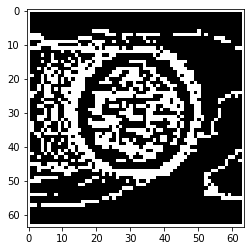

Label for image: Centrales_sp


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the data generator
train_datagen = ImageDataGenerator()

target_size = (64, 64)  # set the image size

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical')

# Load the first batch of images and labels
batch_images, batch_labels = next(train_generator)

# Display the first image in the batch
plt.imshow(batch_images[0])
plt.show()

# Print the label for the first image
label_names = list(train_generator.class_indices.keys())
label_index = np.argmax(batch_labels[0])
label_name = label_names[label_index]
print("Label for image:", label_name)

In [8]:
# Set the number of classes
num_classes = 50

# Set the batch size and number of epochs
batch_size = 32
epochs = 10


# Define the data generators
train_datagen = ImageDataGenerator()

val_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='categorical'
)

# Get the class indices from the generator
class_indices = train_generator.class_indices

# Compute the class weights
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_generator.classes),
                                        y = train_generator.classes                                                    
                                    )
class_weight_dict = dict(zip(np.unique(train_generator.classes), class_weights))
class_weights

#class_weights = compute_class_weight('balanced', np.unique(train_generator.classes), train_generator.classes)

# Convert the class weights to a dictionary
#class_weight_dict = dict(enumerate(class_weights))




# Define the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with the balanced class weights
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    class_weight=class_weight_dict
)

# Evaluate the model on the test dataset
results = model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)

print('Test accuracy:', results[1])

Found 45828 images belonging to 50 classes.
Found 9438 images belonging to 50 classes.
Found 9504 images belonging to 50 classes.
Epoch 1/10
1432/1432 [==============================] - 749s 523ms/step - loss: 2.3325 - acc: 0.4759 - val_loss: 1.1763 - val_acc: 0.6480
Epoch 2/10
1432/1432 [==============================] - 812s 567ms/step - loss: 1.4254 - acc: 0.6264 - val_loss: 1.2598 - val_acc: 0.6187
Epoch 3/10
1432/1432 [==============================] - 794s 554ms/step - loss: 1.3022 - acc: 0.6437 - val_loss: 1.8097 - val_acc: 0.4384
Epoch 4/10
1432/1432 [==============================] - 771s 538ms/step - loss: 1.3006 - acc: 0.6334 - val_loss: 1.1688 - val_acc: 0.6506
Epoch 5/10
1432/1432 [==============================] - 772s 539ms/step - loss: 1.3166 - acc: 0.6345 - val_loss: 1.1460 - val_acc: 0.6610
Epoch 6/10
1432/1432 [==============================] - 775s 541ms/step - loss: 1.3189 - acc: 0.6412 - val_loss: 1.2026 - val_acc: 0.6501
Epoch 7/10
1432/1432 [====================

C:\Users\Law Li Zhe\AppData\Local\Temp\ipykernel_2836\1768230350.py:89: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results = model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)


Test accuracy: 0.40488216280937195


In [16]:
import os
os.environ['TF_DISABLE_MKL'] = '1'

# Set the number of classes
num_classes = 50

# Set the batch size and number of epochs
batch_size = 32
epochs = 5


# Define the data generators
train_datagen = ImageDataGenerator()

val_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,100),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(100,100),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100,100),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

# Get the class indices from the generator
class_indices = train_generator.class_indices

# Compute the class weights
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_generator.classes),
                                        y = train_generator.classes                                                    
                                    )
class_weight_dict = dict(zip(np.unique(train_generator.classes), class_weights))
class_weights

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model with the balanced class weights
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    class_weight=class_weight_dict
)

# Evaluate the model on the test dataset
results = model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)

print('Test accuracy:', results[1])

Found 45828 images belonging to 50 classes.
Found 9438 images belonging to 50 classes.
Found 9504 images belonging to 50 classes.
Epoch 1/5
1432/1432 [==============================] - 285s 199ms/step - loss: 2.9737 - acc: 0.3627 - val_loss: 1.6415 - val_acc: 0.5478
Epoch 2/5
1432/1432 [==============================] - 302s 211ms/step - loss: 2.3248 - acc: 0.4513 - val_loss: 1.2803 - val_acc: 0.6297
Epoch 3/5
1432/1432 [==============================] - 301s 210ms/step - loss: 2.2515 - acc: 0.4387 - val_loss: 1.9098 - val_acc: 0.4457
Epoch 4/5
1432/1432 [==============================] - 303s 211ms/step - loss: 2.4240 - acc: 0.3810 - val_loss: 1.8332 - val_acc: 0.4493
Epoch 5/5
1432/1432 [==============================] - 313s 218ms/step - loss: 2.6251 - acc: 0.3277 - val_loss: 2.1594 - val_acc: 0.3548


C:\Users\Law Li Zhe\AppData\Local\Temp\ipykernel_2836\1961619936.py:87: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results = model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)


Test accuracy: 0.3620580732822418


In [45]:
import os
os.environ['TF_DISABLE_MKL'] = '1'

# Set the number of classes
num_classes = 50

# Set the batch size and number of epochs
batch_size = 32
epochs = 5


# Define the data generators
train_datagen = ImageDataGenerator()

val_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,100),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(100,100),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100,100),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

# Get the class indices from the generator
class_indices = train_generator.class_indices

# Compute the class weights
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_generator.classes),
                                        y = train_generator.classes                                                    
                                    )
class_weight_dict = dict(zip(np.unique(train_generator.classes), class_weights))
class_weights

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])



# Compile the model with the balanced class weights
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    class_weight=class_weight_dict
)

# Evaluate the model on the test dataset
results = model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)

print('Test accuracy:', results[1])



Found 45828 images belonging to 50 classes.
Found 9438 images belonging to 50 classes.
Found 9504 images belonging to 50 classes.
Epoch 1/5
1432/1432 [==============================] - 945s 659ms/step - loss: 2.1827 - acc: 0.4774 - val_loss: 1.0493 - val_acc: 0.7185
Epoch 2/5
1432/1432 [==============================] - 993s 694ms/step - loss: 1.2732 - acc: 0.6661 - val_loss: 0.7949 - val_acc: 0.7949
Epoch 3/5
1432/1432 [==============================] - 998s 697ms/step - loss: 1.0010 - acc: 0.7332 - val_loss: 0.6297 - val_acc: 0.8350
Epoch 4/5
1432/1432 [==============================] - 987s 689ms/step - loss: 0.7864 - acc: 0.7793 - val_loss: 1.4129 - val_acc: 0.7056
Epoch 5/5
1432/1432 [==============================] - 999s 698ms/step - loss: 0.6302 - acc: 0.8170 - val_loss: 0.7987 - val_acc: 0.8204


C:\Users\Law Li Zhe\AppData\Local\Temp\ipykernel_2836\2285207769.py:93: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results = model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)


Test accuracy: 0.8242844939231873


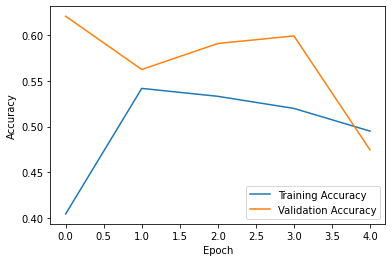

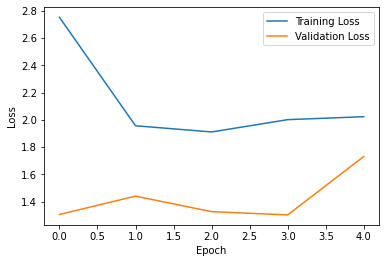

In [30]:
# Plot the training and validation accuracy across epochs
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss across epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import classification_report
# Predict the classes of the test set images
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())

# Convert class indices to class labels
true_class_labels = [class_labels[i] for i in true_classes]
pred_class_labels = [class_labels[i] for i in y_pred_classes]

# Print classification report
print('Classification Report')
print(classification_report(true_class_labels, pred_class_labels))

297/297 [==============================] - 38s 127ms/step
Classification Report
                                    precision    recall  f1-score   support

                 Amylax_triacantha       0.00      0.00      0.00         4
           Aphanizomenon_flosaquae       0.10      0.11      0.10      1049
       Aphanothece_paralleliformis       0.00      0.00      0.00         5
                             Beads       0.00      0.00      0.00        20
                      Centrales_sp       0.00      0.00      0.00        72
             Ceratoneis_closterium       0.00      0.00      0.00         8
                    Chaetoceros_sp       0.01      0.02      0.02       208
             Chaetoceros_sp_single       0.00      0.00      0.00        33
                    Chlorococcales       0.00      0.00      0.00        15
                     Chroococcales       0.00      0.00      0.00        22
                 Chroococcus_small       0.02      0.02      0.02       125
       

In [32]:
from sklearn.metrics import classification_report

# Get the true labels for the test dataset
y_true = test_generator.classes

# Use the model to predict the class probabilities for the test dataset
y_pred = model.predict_generator(test_generator, steps=test_generator.samples // batch_size)

# Convert the predicted class probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Get the classification report
target_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

C:\Users\Law Li Zhe\AppData\Local\Temp\ipykernel_2836\1284649677.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator, steps=test_generator.samples // batch_size)


                                    precision    recall  f1-score   support

                 Amylax_triacantha       0.00      0.00      0.00         4
           Aphanizomenon_flosaquae       0.10      0.08      0.09      1049
       Aphanothece_paralleliformis       0.00      0.20      0.01         5
                             Beads       0.00      0.00      0.00        20
                      Centrales_sp       0.00      0.00      0.00        72
             Ceratoneis_closterium       0.00      0.00      0.00         8
                    Chaetoceros_sp       0.01      0.01      0.01       208
             Chaetoceros_sp_single       0.00      0.00      0.00        33
                    Chlorococcales       0.00      0.00      0.00        15
                     Chroococcales       0.00      0.00      0.00        22
                 Chroococcus_small       0.01      0.01      0.01       125
                           Ciliata       0.01      0.03      0.01        37
           

In [36]:
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model
from PIL import Image
import numpy as np

# Load the image you want to make a prediction on
img_path = 'C:/Users/Law Li Zhe/Desktop/Processed_Split/Processed_Split/test/Centrales_sp/Centrales_sp_149.png'
img = Image.open(img_path)
img = img.resize((100, 100))  # Resize the image to match the input size of the model
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Use the model to make a prediction on the image
prediction = model.predict(img_array)

# Print the predicted class label
predicted_class = np.argmax(prediction)
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]
print('Predicted label:', predicted_label)


1/1 [==============================] - 0s 160ms/step
Predicted label: Peridiniella_catenata_chain


In [48]:
import os
os.environ['TF_DISABLE_MKL'] = '1'

# Set the number of classes
num_classes = 50

# Set the batch size and number of epochs
batch_size = 32
epochs = 5


# Define the data generators
train_datagen = ImageDataGenerator()

val_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,100),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(100,100),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100,100),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

# Get the class indices from the generator
class_indices = train_generator.class_indices

# Compute the class weights
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_generator.classes),
                                        y = train_generator.classes                                                    
                                    )
class_weight_dict = dict(zip(np.unique(train_generator.classes), class_weights))
class_weights

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(50, activation='softmax')
])



# Compile the model with the balanced class weights
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    class_weight=class_weight_dict
)

# Evaluate the model on the test dataset
results = model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)

print('Test accuracy:', results[1])



Found 45828 images belonging to 50 classes.
Found 9438 images belonging to 50 classes.
Found 9504 images belonging to 50 classes.
Epoch 1/5
1432/1432 [==============================] - 391s 272ms/step - loss: 2.6207 - acc: 0.5081 - val_loss: 1.1007 - val_acc: 0.6839
Epoch 2/5
1432/1432 [==============================] - 390s 272ms/step - loss: 1.1718 - acc: 0.7118 - val_loss: 1.5762 - val_acc: 0.5520
Epoch 3/5
1432/1432 [==============================] - 393s 274ms/step - loss: 0.8406 - acc: 0.7804 - val_loss: 1.2179 - val_acc: 0.7126
Epoch 4/5
1432/1432 [==============================] - 393s 274ms/step - loss: 0.6261 - acc: 0.8330 - val_loss: 1.2110 - val_acc: 0.7163
Epoch 5/5
1432/1432 [==============================] - 396s 276ms/step - loss: 0.5070 - acc: 0.8583 - val_loss: 1.3708 - val_acc: 0.7905


C:\Users\Law Li Zhe\AppData\Local\Temp\ipykernel_2836\3944601089.py:91: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results = model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)


Test accuracy: 0.7956649661064148


In [49]:
from sklearn.metrics import classification_report
# Predict the classes of the test set images
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())

# Convert class indices to class labels
true_class_labels = [class_labels[i] for i in true_classes]
pred_class_labels = [class_labels[i] for i in y_pred_classes]

# Print classification report
print('Classification Report')
print(classification_report(true_class_labels, pred_class_labels))

297/297 [==============================] - 18s 61ms/step
Classification Report
                                    precision    recall  f1-score   support

                 Amylax_triacantha       0.00      0.00      0.00         4
           Aphanizomenon_flosaquae       0.11      0.12      0.11      1049
       Aphanothece_paralleliformis       0.00      0.00      0.00         5
                             Beads       0.00      0.00      0.00        20
                      Centrales_sp       0.01      0.01      0.01        72
             Ceratoneis_closterium       0.00      0.00      0.00         8
                    Chaetoceros_sp       0.05      0.04      0.04       208
             Chaetoceros_sp_single       0.03      0.03      0.03        33
                    Chlorococcales       0.00      0.00      0.00        15
                     Chroococcales       0.00      0.00      0.00        22
                 Chroococcus_small       0.01      0.01      0.01       125
        

c:\users\law li zhe\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\law li zhe\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\law li zhe\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [ ]:
from keras.models import load_model

# Save model
model.save('phytoplankton_cnn.h5')

# Load the saved model
model = load_model('phytoplankton_cnn.h5')